In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import pickle
from sklearn.metrics import pairwise_distances, pairwise_kernels
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF
import networkx as nx
from tqdm.notebook import tqdm

import os
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) 

import pandas as pd

import copy

In [2]:
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

In [3]:
n_labels = {}
for i in range(17):
    n_labels[i] = i+1

In [4]:
def plot_network(G, pos, labels, name, weights=False, eigenvector_centrality=False):
    if eigenvector_centrality==True:
        if weights==True:
            degree = nx.eigenvector_centrality(G,  weight='weight') 
        else:
            degree = nx.eigenvector_centrality(G) 
            
    if weights==True:
        for (u, v, d) in G.edges(data=True):
            G[u][v]["color"] = sns.color_palette('Reds', 100)[int(d["weight"]*100)-1]
            G[u][v]["alpha"] = d["weight"]
            G[u][v]["width"] = 10*d["weight"]
            
    
    plt.figure(figsize=(13, 6))   
    plt.axis('off')
    plt.title(name)
    
    if eigenvector_centrality==True:
        #define nodes with color and size depending on degree
        nodes = nx.draw_networkx_nodes(G, pos, node_size= list(8**4*i+100 for i in degree.values()), 
                                       cmap=plt.cm.viridis, node_color=list(i for i in degree.values()), 
                                       nodelist=list(degree.keys()))
    else:
        nodes = nx.draw_networkx_nodes(G, pos, node_size= 1000)
            
    #labels      
    labels=nx.draw_networkx_labels(G,pos, labels=n_labels)
    
    #draw edges
    if weights==True:
        edges = nx.draw_networkx_edges(G, pos, edge_color=list(d["weight"] for (u,v,d) in G.edges(data=True)),
                                       edge_cmap = plt.cm.Reds, width=list(d["weight"]*5 for (u,v,d) 
                                                                           in G.edges(data=True)))
    else:
        edges = nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3)
            
    
    if eigenvector_centrality==True:
        plt.colorbar(nodes)
    if weights==True:  
        plt.colorbar(edges)
    plt.show(G)
    

In [27]:
# CHECKPOINT
Adj_li = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_li.pkl', 'rb'))
Adj_lmi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_lmi.pkl', 'rb'))
Adj_umi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_umi.pkl', 'rb'))
Adj_hi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_hi.pkl', 'rb'))

In [6]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [33]:
def plot_network_icons(G, pos, labels, name, shortname, weights=False):
     
            
    if weights==True:
        min_weight= 0.9
        for (u, v, d) in G.edges(data=True):
            if d["weight"]<min_weight:
                min_weight = d["weight"]
            G[u][v]["color"] = sns.color_palette('Reds', 100)[int(d["weight"]*100)-1]
            G[u][v]["alpha"] = d["weight"]
            G[u][v]["width"] = 5*d["weight"]
            
    
    plt.figure(figsize=(17,10))
    plt.tight_layout() 
    plt.title(name, y=1.1, fontdict={'fontsize': 46})
    
        #nodes = nx.draw_networkx_nodes(G, pos, node_size= 1000)
        # nodes
    nx.draw_networkx_nodes(G, pos, node_size=10)

        # labels
    nx.draw_networkx_labels(G, pos, labels=n_labels, font_size=2, font_family='sans-serif')
            
    #labels      
    #labels=nx.draw_networkx_labels(G,pos, labels=n_labels)
    
    vmin=min_weight-0.05
    vmax=1.0
    #draw edges
    if weights==True:
        edges = nx.draw_networkx_edges(G, pos, edge_color=list(d["weight"] for (u,v,d) in G.edges(data=True)),
                                       edge_cmap = plt.cm.Reds, edge_vmin=vmin, edge_vmax=vmax,
                                       width=list(d["weight"]*6 for (u,v,d)
                                                                           in G.edges(data=True)))
    else:
        edges = nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3)
      
    if weights==True: 
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin = vmin, vmax=vmax))
        plt.colorbar(sm)
        
    ax=plt.gca()
    fig=plt.gcf()
    trans = ax.transData.transform
    trans_axes = fig.transFigure.inverted().transform
    imsize = 0.115    # this is the image size

    for node in G.nodes():
        (x,y) = pos[node] 
        xx,yy = trans((x,y)) # figure coordinates
        xa,ya = trans_axes((xx,yy)) # axes coordinates
        angle = np.arctan(y/x)
        xadd = 0.025*np.cos(angle)
        yadd = 0.025*np.sin(angle)
        if x>0:
            a = plt.axes([xa-imsize/2.0+xadd,ya-imsize/2.0+yadd, imsize, imsize])
        else:
            a = plt.axes([xa-imsize/2.0-xadd,ya-imsize/2.0-yadd, imsize, imsize])
        
        a.imshow(mpimg.imread('/Users/saravallejomengod/MathsYear4/M4R/utils/SDG_icons/SDG-{}.png'.format(node+1)))
        a.axis('off')
    

    plt.axis('off')
    ax.axis('off')
    

    plt.show(G)
    

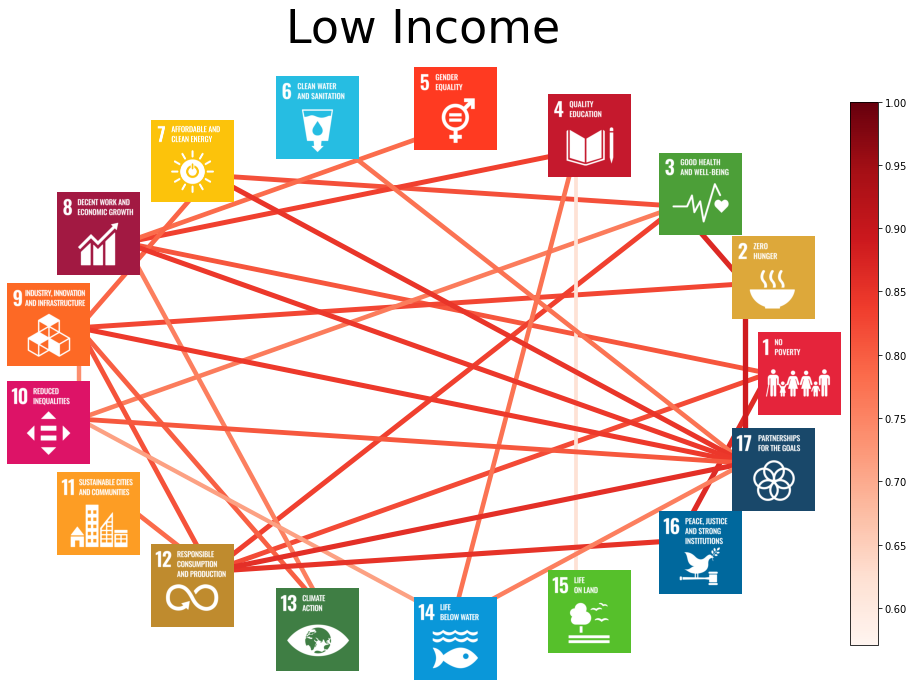

In [28]:
G_li = nx.Graph(np.sqrt(Adj_li))     #define graph
pos_li = nx.circular_layout(G_li)  # compute graph layout

#plot
plot_network_icons(G_li, pos_li, n_labels, 'Low Income','LI', weights=True)

In [30]:
len(G_li.edges)-17

28

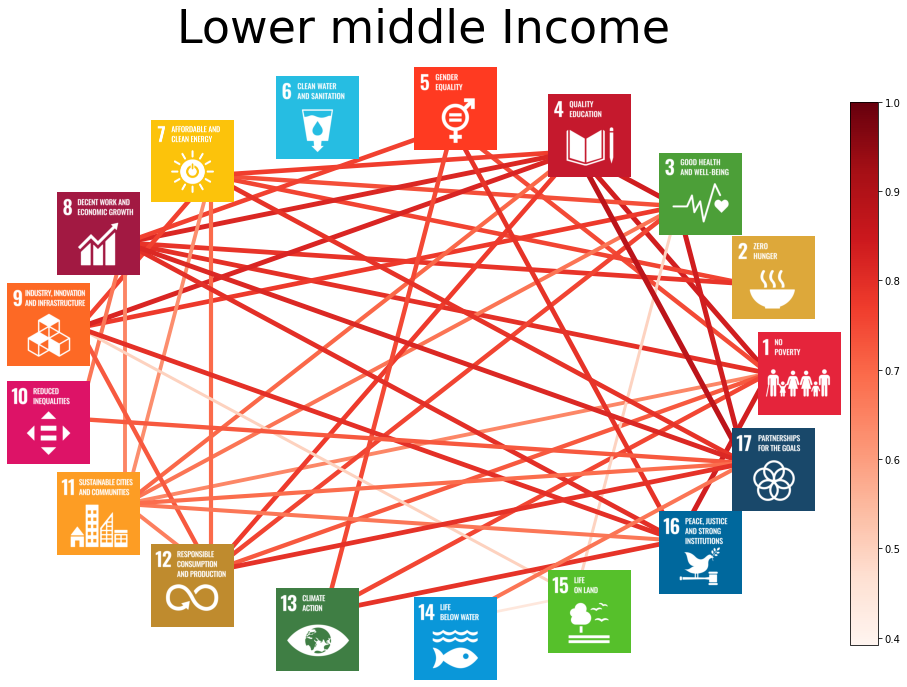

In [34]:
G_lmi = nx.Graph(np.sqrt(Adj_lmi))     #define graph
pos_lmi = nx.circular_layout(G_lmi)  # compute graph layout

#plot
plot_network_icons(G_lmi, pos_lmi, n_labels, 'Lower middle Income', 'LMI', weights=True)

In [35]:
len(G_lmi.edges)-17

44

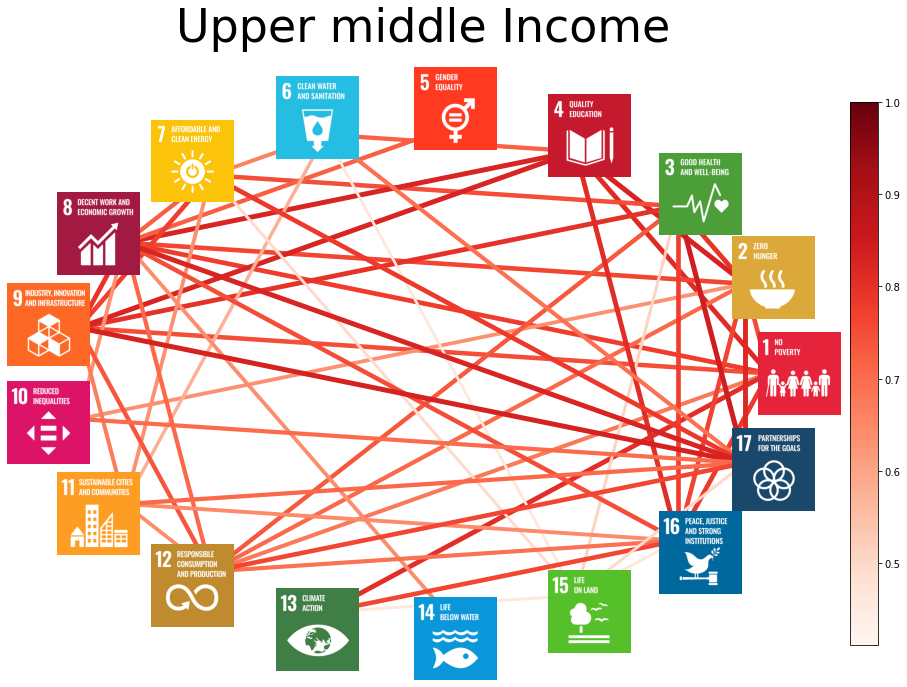

In [36]:
G_umi = nx.Graph(np.sqrt(Adj_umi))     #define graph
pos_umi = nx.circular_layout(G_umi)  # compute graph layout

#plot
plot_network_icons(G_umi, pos_umi, n_labels, 'Upper middle Income', 'UMI',weights=True)

In [37]:
len(G_umi.edges)-17

53

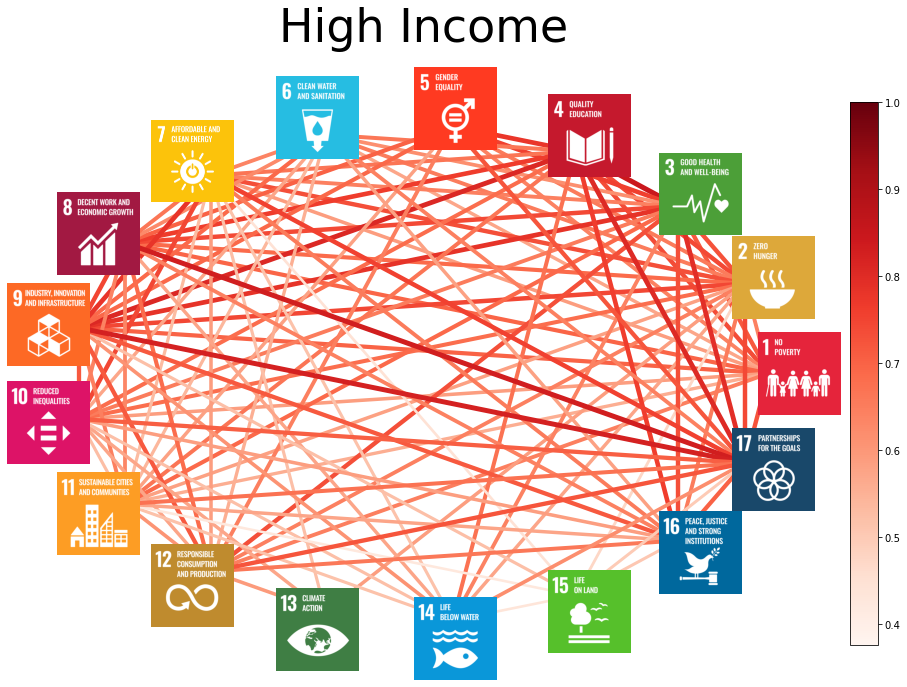

In [39]:
G_hi = nx.Graph(np.sqrt(Adj_hi))     #define graph
pos_hi = nx.circular_layout(G_hi)  # compute graph layout

#plot
plot_network_icons(G_hi, pos_hi, n_labels, 'High Income','HI', weights=True)

In [40]:
len(G_hi.edges)-17

105

In [41]:
# CHECKPOINT
Adj_e = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_e.pkl', 'rb'))
Adj_as = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_as.pkl', 'rb'))
Adj_af = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_af.pkl', 'rb'))
Adj_am = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_am.pkl', 'rb'))

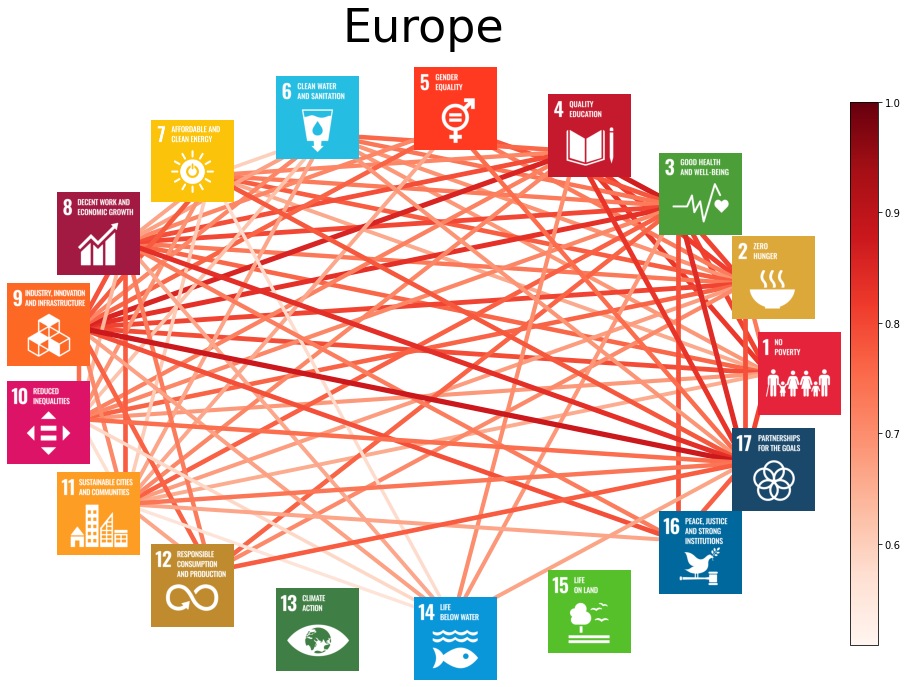

In [42]:
#graph with only 2-way dependencies
G_e = nx.Graph(np.sqrt(Adj_e))     #define graph
pos_e = nx.circular_layout(G_e)  # compute graph layout

#plot
plot_network_icons(G_e, pos_e, n_labels, 'Europe', 'E',weights=True)

In [43]:
len(G_e.edges)-17

80

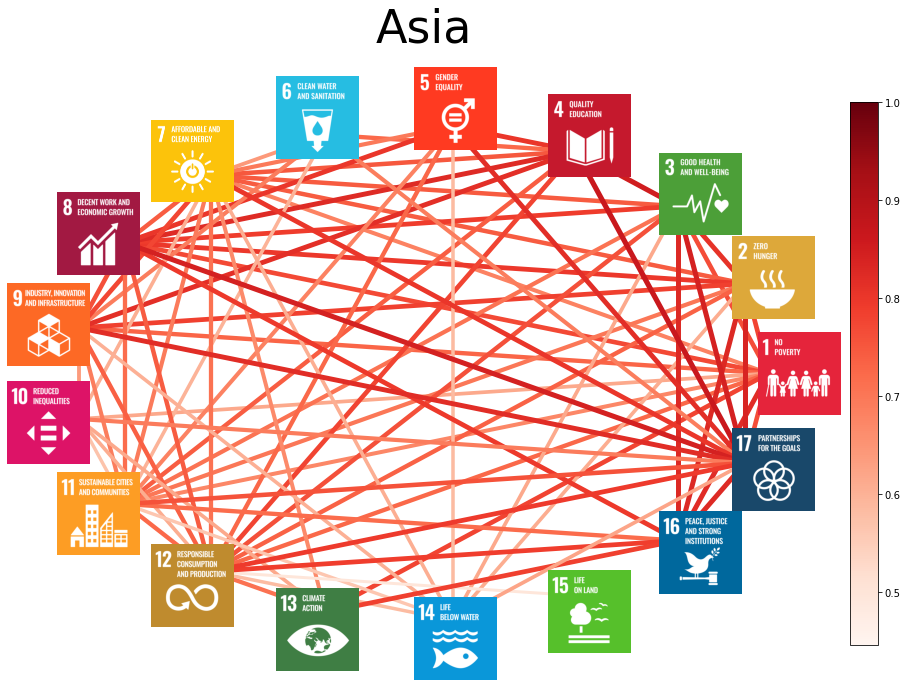

In [44]:
#graph with only 2-way dependencies
G_as = nx.Graph(np.sqrt(Adj_as))     #define graph
pos_as = nx.circular_layout(G_as)  # compute graph layout

#plot
plot_network_icons(G_as, pos_as, n_labels, 'Asia', 'AS', weights=True)

In [45]:
len(G_as.edges)-17

80

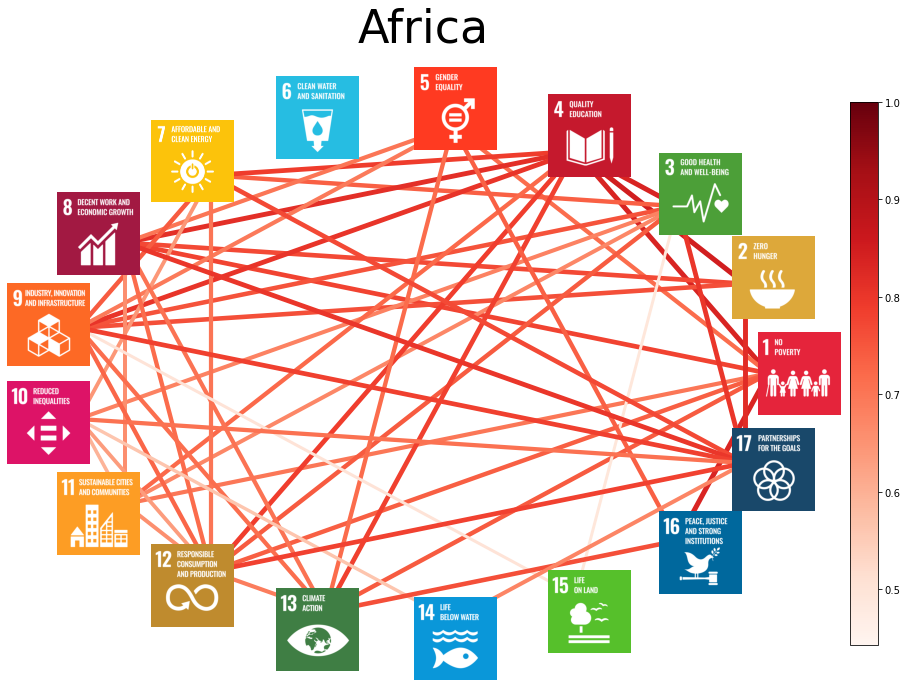

In [46]:
#graph with only 2-way dependencies
G_af = nx.Graph(np.sqrt(Adj_af))     #define graph
pos_af = nx.circular_layout(G_af)  # compute graph layout

#plot
plot_network_icons(G_af, pos_af, n_labels, 'Africa','AF', weights=True)

In [47]:
len(G_af.edges)-17

50

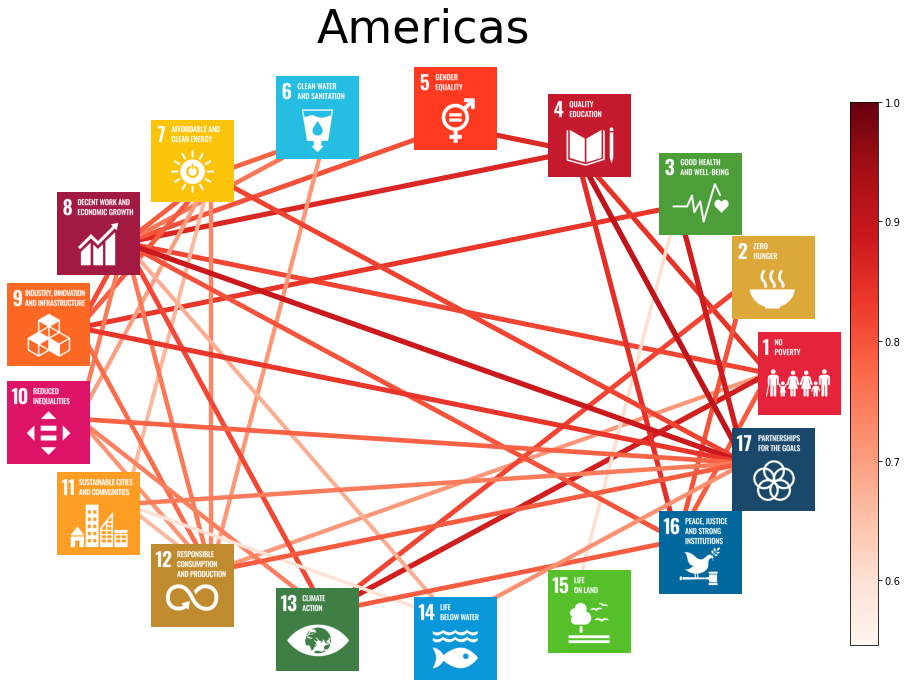

In [48]:
#graph with only 2-way dependencies
G_am = nx.Graph(np.sqrt(Adj_am))     #define graph
pos_am = nx.circular_layout(G_am)  # compute graph layout

#plot
plot_network_icons(G_am, pos_am, n_labels, 'Americas', 'AM', weights=True)

In [49]:
len(G_am.edges)-17

42

In [70]:
np.sqrt(Adj_e)[:,-1]

array([0.80595004, 0.78813771, 0.84246524, 0.82663817, 0.74966351,
       0.68850384, 0.77774796, 0.83508981, 0.87581501, 0.74664766,
       0.73621066, 0.77086208, 0.        , 0.66700137, 0.        ,
       0.76921556, 1.        ])

In [71]:
np.sqrt(Adj_e)

array([[1.        , 0.72807171, 0.80685782, 0.81990855, 0.        ,
        0.6866428 , 0.65646842, 0.75986468, 0.79346073, 0.68292398,
        0.65299191, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.80595004],
       [0.72807171, 1.        , 0.80603928, 0.81226715, 0.72656655,
        0.69217838, 0.76969585, 0.7314052 , 0.80585237, 0.76200655,
        0.67600394, 0.70520238, 0.        , 0.        , 0.        ,
        0.        , 0.78813771],
       [0.80685782, 0.80603928, 1.        , 0.86776763, 0.78040446,
        0.73610934, 0.72826749, 0.79863474, 0.83388449, 0.70925291,
        0.76600457, 0.76364293, 0.        , 0.6845413 , 0.        ,
        0.78778824, 0.84246524],
       [0.81990855, 0.81226715, 0.86776763, 1.        , 0.        ,
        0.75658433, 0.71119088, 0.79150614, 0.85486995, 0.71905937,
        0.7097155 , 0.        , 0.        , 0.70164283, 0.        ,
        0.        , 0.82663817],
       [0.        , 0.72656655, 0.78040446, 0.      

In [18]:
def plot_eig_centralities(G, name, shortname):
    degree = nx.eigenvector_centrality(G,  weight='weight')
    
    values = list(degree.values())
    labels = []
    for i in np.arange(17):
        labels.append('SDG {}'.format(i+1))
        
    colors = [(229/255, 36/255, 59/255), (221/255, 166/255, 58/255), (76/255, 159/255, 56/255), (197/255, 25/255, 45/255),
         (1, 58/255, 33/255), (38/255, 189/255, 226/255), (252/255,195/255, 11/255), (162/255,25/255, 66/255),
         (253/255, 105/255, 37/255), (221/255, 19/255, 103/255), (253/255, 157/255, 36/255),
          (191/255, 139/255, 46/255), (63/255, 126/255, 68/255), (10/255, 151/255, 217/255), (86/255, 192/255, 43/255),
         (0, 104/255, 157/255), (25/255, 72/255, 106/255)]
    
    width = 0.95
    plt.figure(figsize=(18,10))
    plt.tight_layout() 
    
    plt.bar(x=labels, height=values, width=width, color = colors, align='center')
    
    for i, (label, value) in enumerate(zip(labels, values)):
        img = mpimg.imread('/Users/saravallejomengod/MathsYear4/M4R/utils/SDG_icons/SDG-{}.png'.format(i+1))
        plt.imshow(img, extent=[i-width/2,i + width/2-0.01,  value - 0.052, value-0.002 ], aspect='auto', zorder=2)
        
    
    plt.ylim(0, max(values) * 1.05)
    plt.xlim(-0.5, len(values)-0.5 )
    
    plt.xticks(fontsize=13)
    
    plt.ylabel('Eigenvector centrality', x=-0.06, fontdict={'fontsize': 18})
    plt.title(name, y=1.05, fontdict={'fontsize': 46})
    plt.savefig('/Users/saravallejomengod/MathsYear4/M4R/utils/nx/{}_EC_try.png'.format(shortname), format='png', bbox_inches='tight')
    plt.show()

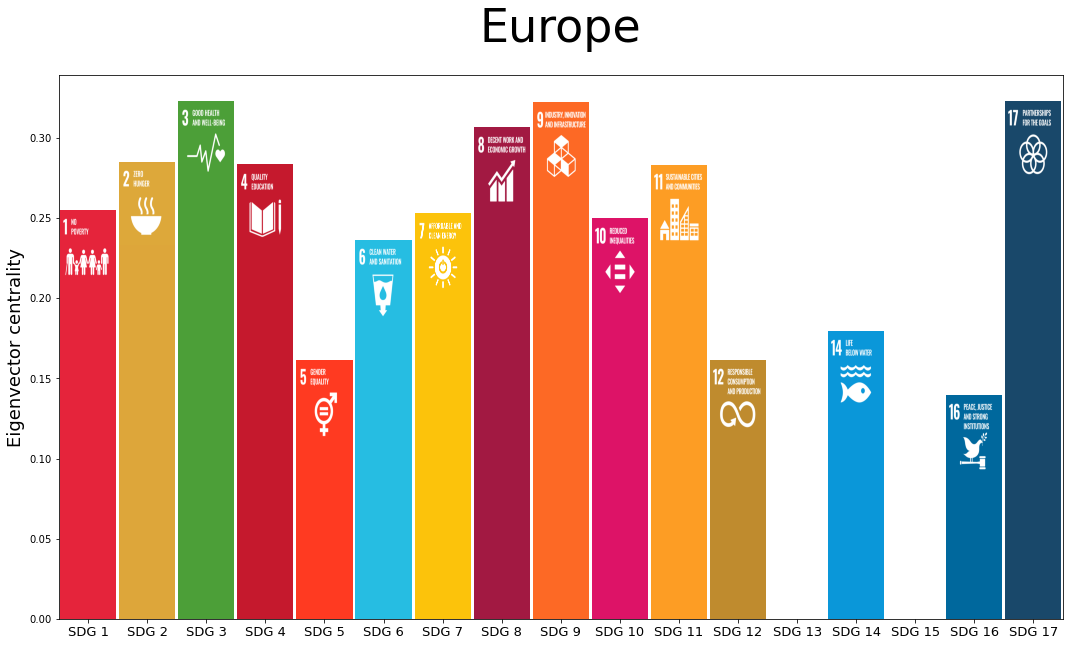

In [191]:
plot_eig_centralities(G_e, 'Europe', 'E')

In [48]:
G_e = nx.Graph(np.sqrt(Adj_e))   
nx.eigenvector_centrality(G_e,  weight='weight')

{0: 0.25501529101914616,
 1: 0.2852366780743543,
 2: 0.32300127324965855,
 3: 0.28347584588853997,
 4: 0.16167265838207537,
 5: 0.23633252066514476,
 6: 0.25300677919262526,
 7: 0.306569745128912,
 8: 0.3222277248608904,
 9: 0.24989958288315353,
 10: 0.28341848144850723,
 11: 0.16177413772068724,
 12: 1.8966792250782507e-08,
 13: 0.17976529549737244,
 14: 1.8966792250782507e-08,
 15: 0.1395910592722142,
 16: 0.32303509502259403}

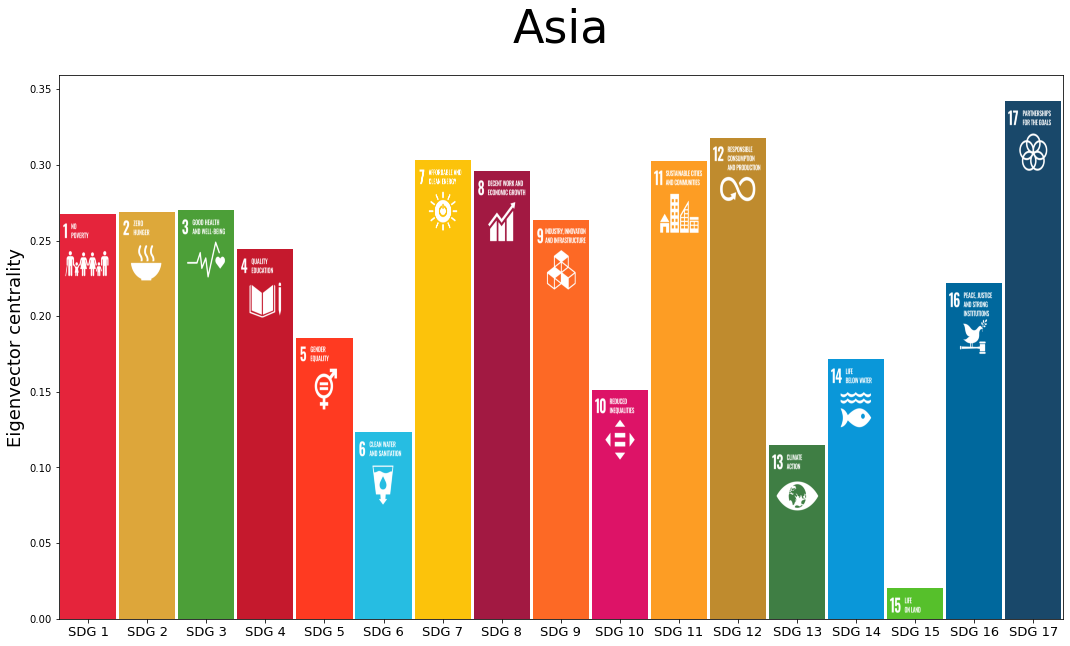

In [192]:
plot_eig_centralities(G_as, 'Asia', 'AS')

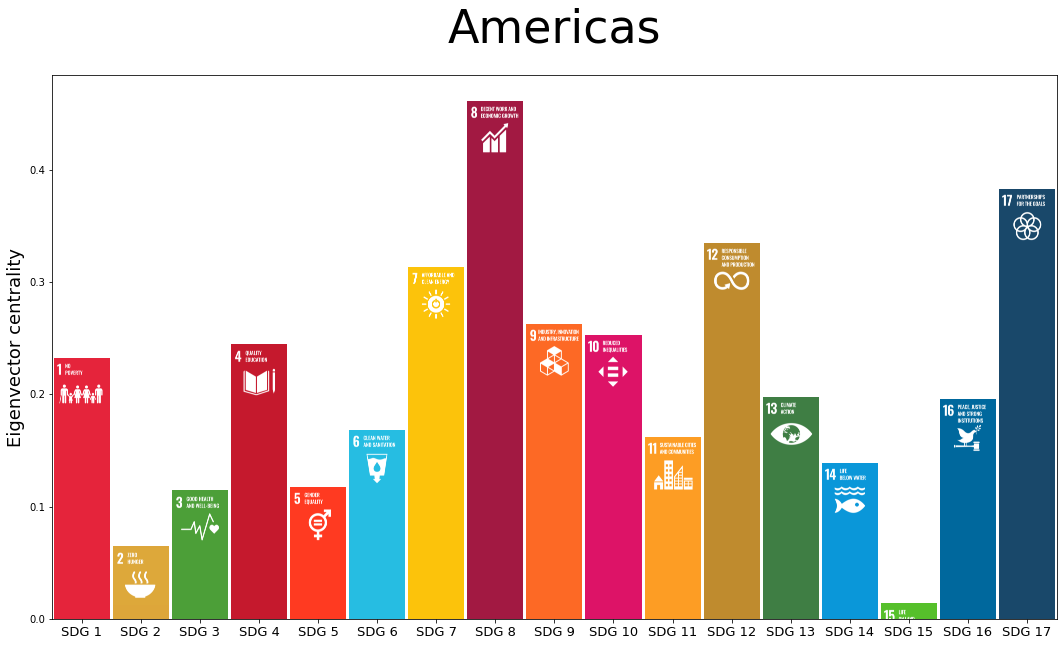

In [193]:
plot_eig_centralities(G_am, 'Americas', 'AM')

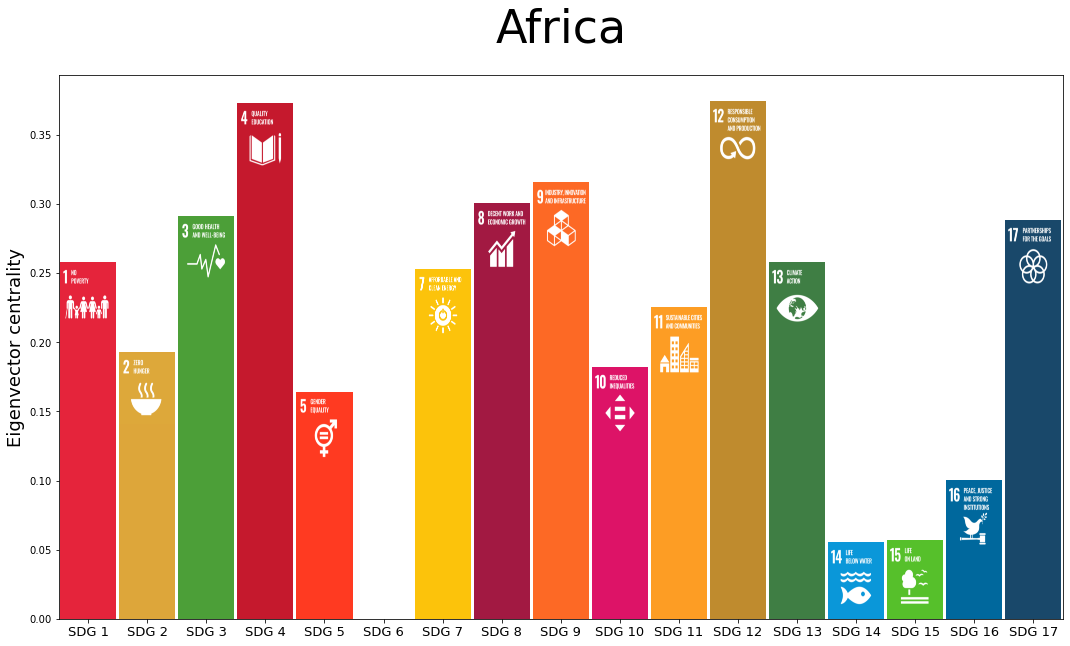

In [194]:
plot_eig_centralities(G_af, 'Africa', 'AF')

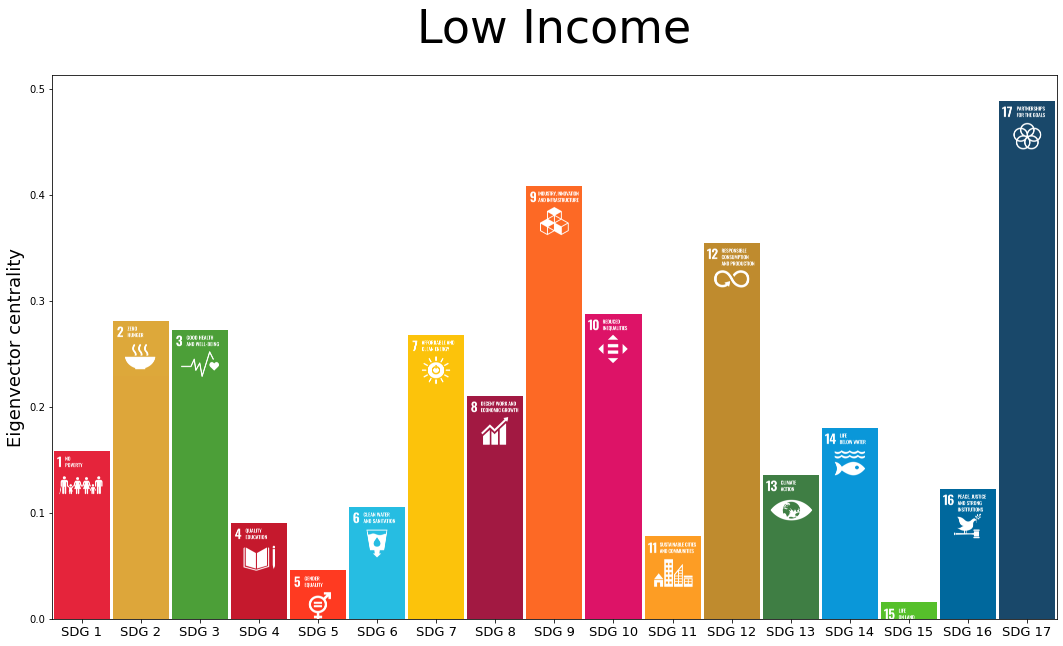

In [195]:
plot_eig_centralities(G_li, 'Low Income', 'LI')

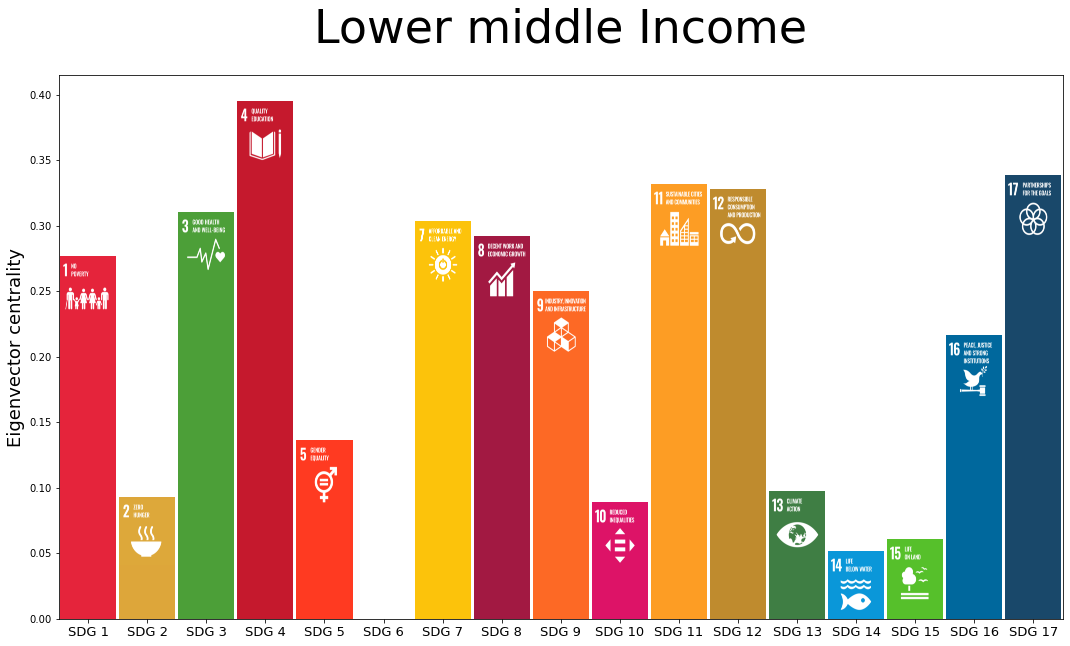

In [22]:
plot_eig_centralities(G_lmi, 'Lower middle Income', 'LMI')

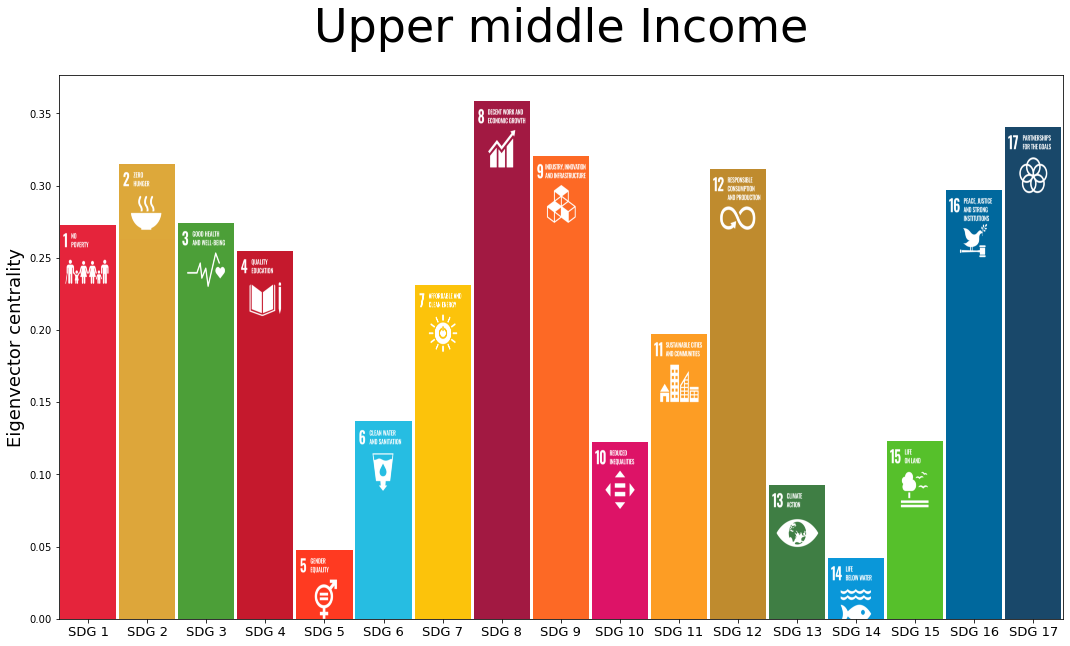

In [198]:
plot_eig_centralities(G_umi, 'Upper middle Income', 'UMI')

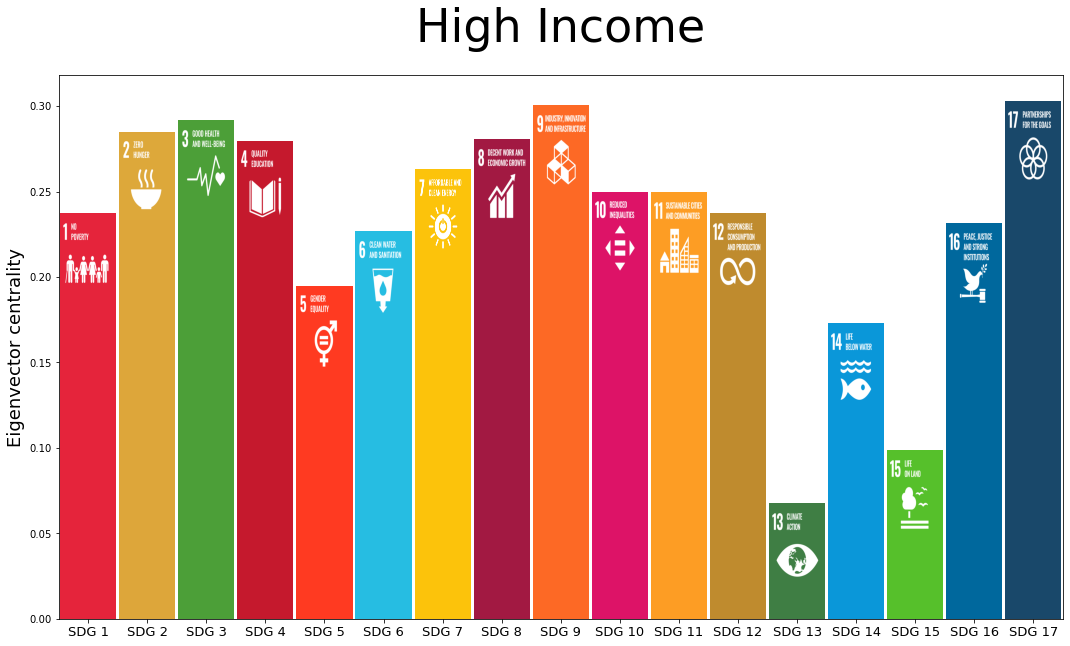

In [199]:
plot_eig_centralities(G_hi, 'High Income', 'HI')

## Compute Gini index

In [53]:
from pygini import gini

In [78]:
degree_li = nx.eigenvector_centrality(G_li,  weight='weight')
print('LI: ', gini(np.array(list(degree_li.values()))))

degree_lmi = nx.eigenvector_centrality(G_lmi,  weight='weight')
print('LMI: ', gini(np.array(list(degree_lmi.values()))))

degree_umi = nx.eigenvector_centrality(G_umi,  weight='weight')
print('UMI: ', gini(np.array(list(degree_umi.values()))))

degree_hi = nx.eigenvector_centrality(G_hi,  weight='weight')
print('HI: ', gini(np.array(list(degree_hi.values()))))

LI:  0.35059297248359406
LMI:  0.3242943706406117
UMI:  0.26246931808061574
HI:  0.14467500913298387
